In [29]:

import scipy.signal as signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser


                                time     cadence  speed
0   2019-11-09 22:40:16.236000+00:00   23.200000  10.00
1   2019-11-09 22:40:17.220000+00:00    0.000000   0.00
2   2019-11-09 22:40:25.222000+00:00    0.000000   0.00
3   2019-11-09 22:40:26.208000+00:00  147.643433   0.00
4   2019-11-09 22:40:27.278000+00:00   51.221924   0.00
..                               ...         ...    ...
255 2019-11-09 22:44:30.204000+00:00    0.000000   1.95
256 2019-11-09 22:44:31.254000+00:00  234.409924   1.95
257 2019-11-09 22:44:32.207000+00:00  234.409924   0.91
258 2019-11-09 22:44:33.203000+00:00    0.000000   1.27
259 2019-11-09 22:44:34.205000+00:00  212.114393   1.20

[260 rows x 3 columns]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


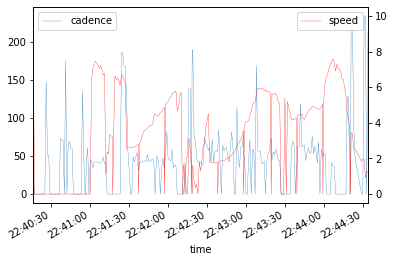

In [30]:
df = pd.read_csv("data/results-mixed.csv", names =['time', 'cadence', 'speed'], parse_dates=['time'] )
# df.time = parser.parse(df.time)
print(df)


n=10
b = [1.0 / n] * n
a = 1


ax = df.plot(x = 'time', y=[ 'cadence'],  linewidth=0.3)
ax1 = ax.twinx()
df.plot('time','speed',ax=ax1, color='r',  linewidth=0.3)
plt.savefig('results.eps', format='eps')
#df.quot = df.speed/df.cadence
#print(df.quot)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


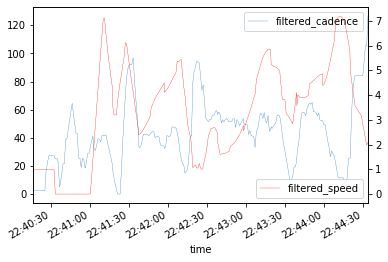

In [31]:
df['filtered_cadence'] = signal.lfilter(b,a,df['cadence'])
df['filtered_speed'] = signal.lfilter(b,a,df['speed'])

ax = df.plot(x = 'time', y=[ 'filtered_cadence'],  linewidth=0.3)
ax1 = ax.twinx()
df.plot('time','filtered_speed',ax=ax1, color='r',  linewidth=0.3)
plt.savefig('filtered-results.eps', format='eps')